### Exploratory Data Analysis

#### Step 1: Select a real-world dataset

- Find and download an interesting real-world dataset (see the Recommended Datasets section below for ideas).
- The dataset should contain tabular data (rows & columns), preferably in CSV/JSON/XLS or other formats that can be read using Pandas.  
  *If it's not in a compatible format, you may have to write some code to convert it to a desired format.*


#### Step 2: Perform data preparation & cleaning
- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


#### Step 3: Perform exploratory analysis & visualization
- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

#### Step 4: Ask & answer questions about the data
- Ask at least 5 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does

#### Step 5: Summarize your inferences & write a conclusion
- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections
- Share ideas for future work on the same topic using other relevant datasets
- Share links to resources you found useful during your analysis


### 🔄 The ML Workflow (Big Picture)<br>
#### Before diving into Titanic, here’s the entire ML model building flow in 6 simple steps:

**Understand the Problem**

    What do we want to predict?

    What kind of ML problem is it? (classification or regression?)

**Get & Explore the Data**

    Load dataset (CSV, database, etc.)

    Look at rows, columns, and types of data

    Handle missing values, categorical variables

**Prepare the Data**

    Train-test split

    Feature scaling/encoding (if needed)

**Train a Model**

    Choose an algorithm (Logistic Regression for classification)

    Fit the model on training data

**Evaluate the Model**

    Predict on test data

    Check metrics like Accuracy, Precision, Recall, Confusion Matrix

**Improve & Tune**

    Try better preprocessing, features, or another model

**This is the same cycle for almost all ML problems.**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# df = pd.read_excel("your_file.xlsx")
# df.to_csv("converted_file.csv", index=False)

In [12]:
# df = pd.read_json("your_file.json")

# df.to_csv("converted_file.csv", index=False)

We have a csv file called titanic_csv and we have to convert it into the data frame so we will here use **pandas** and its function **read_csv**.<br>
Titanic data frame, it is about a disaster that happened on the biggest ship. It has certain attributes like passengers, how many of them survived, what was their name, sex, what was their age, which ticket they were having and the fare of the tickets and the cabin in which they were seated.


In [14]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In this data frame, there is a **passenger id** and we can use the last **passenger id** to get the total number of passengers.<br>
we have used `tail`function which gives us the certain last entries of the data frame.<br>
Similarly, there is a `head` function as well, which gives us the certain top entries .<br>
`.sample(no. of rows)` shows random rows according to no. you provide.

In [16]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Total no. of passengers = 891.
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we have used `sum` function to get the total number of males and females. For smaller values if there is no condition we can use `.sum()`.<br> Since we have applied here condition on the certain column of the data frame so we have used `sum()`.<br>
 `Sum` function in actual tells us the number of **True** values in that data frame will be.

In [16]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.00,0,0,7553,9.8375,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.00,0,0,STON/O2. 3101290,7.9250,NaN,S
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.00,0,1,24160,211.3375,B3,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.00,1,0,11755,39.6000,A16,C
800,801,0,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,NaN,S
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.00,0,0,A/4 45380,8.0500,NaN,S
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
112,113,0,3,"Barton, Mr. David John",male,22.00,0,0,324669,8.0500,NaN,S


This is what `.mode()` will give...a series

0                  S<br>
dtype: object

#### Adding Missing Values:-
    

In [158]:
# titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace = True)-------------this method will not be available from version 3 of pandas
titanic_df.fillna({'Age': titanic_df['Age'].median()}, inplace=True)
titanic_df.fillna({'Embarked': titanic_df['Embarked'].mode()[0]}, inplace=True)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [159]:
# Total males and females:-
total_males = sum(titanic_df.Sex == 'male')
print(total_males)

total_females = sum(titanic_df.Sex == 'female')
total_females

577


314

In [161]:
# No.of passengers survived:-
total_survived = titanic_df.Survived.sum()
total_survived

342

#### Survival rate according to Sex

In [163]:
# This is how we create a smaller dataframe based on conditions applied.
survived_df = titanic_df[titanic_df.Survived == 1]
survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0


In [164]:
#Survived males and females:-
survived_males = sum(survived_df.Sex == 'male')
print(survived_males)

survived_females = sum(survived_df.Sex == 'female')
print(survived_females)

109
233


In [165]:
# Surviving rate:-
s_rate_males = survived_males*100/total_males
print(s_rate_males)

s_rate_females = survived_females*100/total_females
print(s_rate_females)

18.890814558058924
74.20382165605096


***The lower survival rate of males compared to females in the Titanic disaster was primarily due to the implementation of the "women and children first" policy during the evacuation.***

In [167]:
# Lets check for adults, children or old age:-
# total_M_children = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Age'] <= 18)]

total_M_children = titanic_df.query("Sex == 'male' and Age <= 18")
print(total_M_children)

total_F_children = titanic_df.query("Sex == 'female' and Age <= 18")
print(total_F_children)

     PassengerId  Survived  Pclass                                     Name  \
7              8         0       3           Palsson, Master. Gosta Leonard   
16            17         0       3                     Rice, Master. Eugene   
50            51         0       3               Panula, Master. Juha Niilo   
59            60         0       3       Goodwin, Master. William Frederick   
63            64         0       3                    Skoog, Master. Harald   
..           ...       ...     ...                                      ...   
834          835         0       3                   Allum, Mr. Owen George   
841          842         0       2                 Mudd, Mr. Thomas Charles   
844          845         0       3                      Culumovic, Mr. Jeso   
850          851         0       3  Andersson, Master. Sigvard Harald Elias   
869          870         1       3          Johnson, Master. Harold Theodor   

      Sex   Age  SibSp  Parch       Ticket     Fare

In [168]:
print(len(total_M_children))
print(len(total_F_children))

71
68


In [169]:
# Survived Children:-
survived_M_children = survived_df.query("Sex == 'male' and Age <= 18")
survived_M_children


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,2
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C,1
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S,2
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,3
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S,2
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S,0
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.00,0,0,SOTON/OQ 392089,8.0500,NaN,S,0
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.00,4,2,347077,31.3875,NaN,S,6
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,3
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S,2


In [170]:
survived_F_children = survived_df.query("Sex == 'female' and Age <= 18")
survived_F_children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,2
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Q,0
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C,1
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,3
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S,3
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S,6
84,85,1,2,"Ilett, Miss. Bertha",female,17.00,0,0,SO/C 14885,10.5000,NaN,S,0
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.00,0,0,35851,7.7333,NaN,Q,0
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S,2


In [171]:
print(len(survived_M_children))
print(len(survived_F_children))

24
46


In [172]:
#Survival Rate of childrens:-
s_rate_M_child = len(survived_M_children)*100/len(total_M_children)
print(s_rate_M_child)              
                                                  
s_rate_F_child = len(survived_F_children)*100/len(total_F_children)
print(s_rate_F_child)

33.80281690140845
67.6470588235294


In [173]:
# Ovrerall child s_rate:-
total_child = len(total_F_children) + len(total_M_children)
print(total_child)
survived_child = len(survived_F_children) + len(survived_M_children)
print(survived_child)

s_rate_child = survived_child*100/total_child
s_rate_child

139
70


50.35971223021583

In [174]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family_Size  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [175]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


#### Survival rates according to Fares.

In [178]:
avg_fare = titanic_df.Fare.mean()

people_paid_above_avg = sum(titanic_df.Fare >= avg_fare)
print(people_paid_above_avg)

survived_people_paid_above_avg = sum(survived_df.Fare >= avg_fare)
print(survived_people_paid_above_avg)

s_rate_people_paid_above_avg = survived_people_paid_above_avg*100/people_paid_above_avg
s_rate_people_paid_above_avg

211
126


59.71563981042654

In [179]:
people_paid_below_avg = sum(titanic_df.Fare < avg_fare)
print(people_paid_below_avg)

survived_people_paid_below_avg = sum(survived_df.Fare < avg_fare)
print(survived_people_paid_below_avg)

s_rate_people_paid_below_avg = survived_people_paid_below_avg*100/people_paid_below_avg
s_rate_people_paid_below_avg

680
216


31.764705882352942

In [180]:
grouped_df = titanic_df.groupby(['Embarked'])

total_people_city = grouped_df['Survived'].count()

survived_people_city = grouped_df['Survived'].sum()
# sum because it will add all 0s and 1s and sum will tell us total survivors.

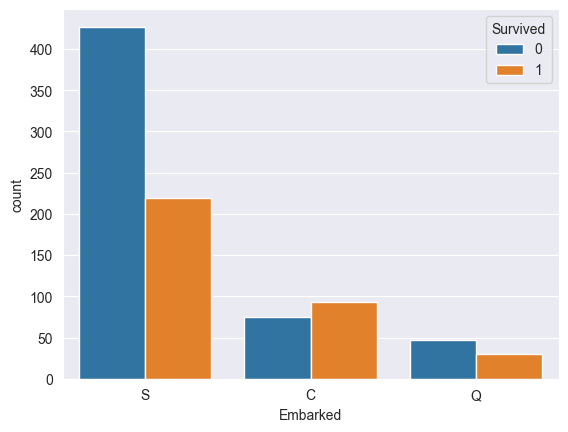

In [181]:
sns.countplot(x = 'Embarked', hue = 'Survived', 
            data = titanic_df)
plt.show()

Count plot is helpful in these situations where you know you put an attribute on X axis and it tells the number of times it has come in the Y axis, it was helpful in this matter I was founding it.

From the above count plot, we have found that Cherbourg, was the only city that had more number of survivors than than non survivors. let us find it out why?

In [184]:
grouped_df = titanic_df.groupby(['Embarked'])
grouped_df.Fare.mean()

Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64

As observed that average fare price of Cherbourg is very high it means that it was a first class people that entered from Cherbourg and that's why they were put first on onto the lifeboat or jackets.

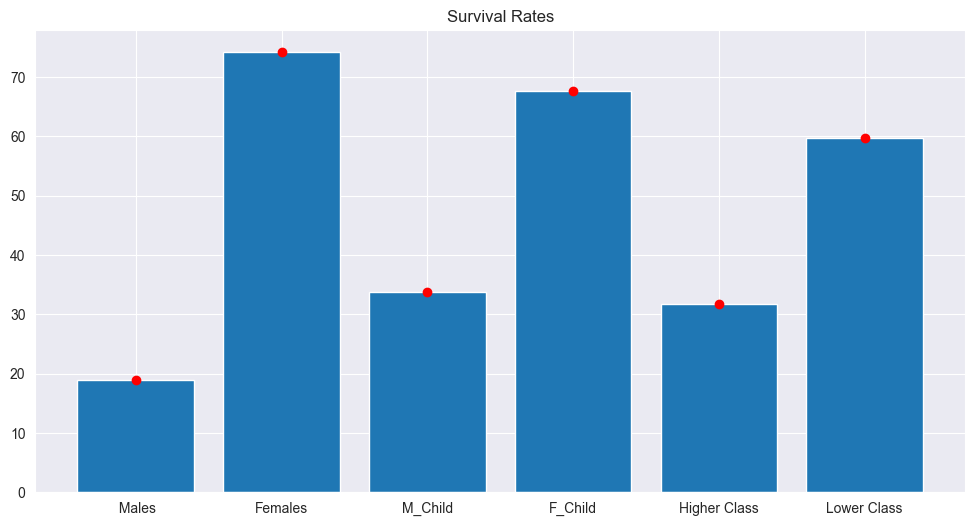

In [187]:
# Graphs:-
s_rates = [s_rate_males, s_rate_females, s_rate_M_child, s_rate_F_child, s_rate_people_paid_below_avg, s_rate_people_paid_above_avg]
categories = [' Males', 'Females', 'M_Child', 'F_Child', 'Higher Class', 'Lower Class']

# one way to handle overlapped x axis names:-
# plt.xticks(rotation = 45) 

# other way is to increase overall figure size:-
plt.figure(figsize = (12,6))

plt.bar(categories, s_rates)
plt.plot(categories, s_rates, 'or')

plt.title("Survival Rates")
plt.show()

Text(0.5, 1.0, 'Survival Count by Gender')

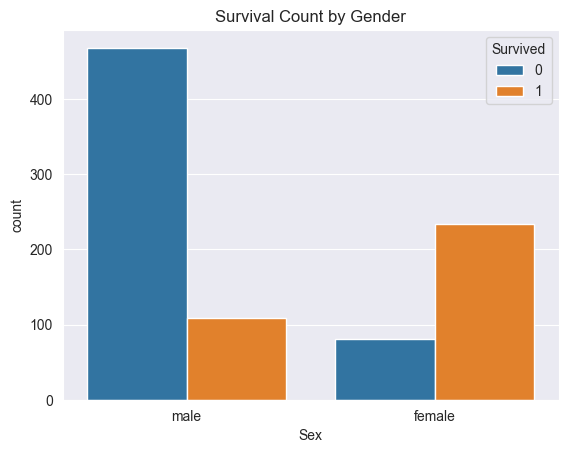

In [188]:
sns.countplot(data=titanic_df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')


In [189]:
# Survival Rate according to class:-

# 1st Class:-
total_1st_class = titanic_df.query("Pclass == 1").shape[0]
survived_1st_class = titanic_df.query("Pclass == 1 and Survived == 1").shape[0]
s_rate_1st_class = survived_1st_class * 100/ total_1st_class
s_rate_1st_class


62.96296296296296

In [190]:
# 2nd Class:-
total_2nd_class = titanic_df.query("Pclass == 2").shape[0]
survived_2nd_class = titanic_df.query("Pclass == 2 and Survived == 1").shape[0]
s_rate_2nd_class = survived_2nd_class * 100/ total_2nd_class
s_rate_2nd_class


47.28260869565217

In [191]:
# 3rd CLass:-
total_3rd_class = titanic_df.query("Pclass == 3").shape[0]
survived_3rd_class = titanic_df.query("Pclass == 3 and Survived == 1").shape[0]
s_rate_3rd_class = survived_3rd_class * 100/ total_3rd_class
s_rate_3rd_class

24.236252545824847

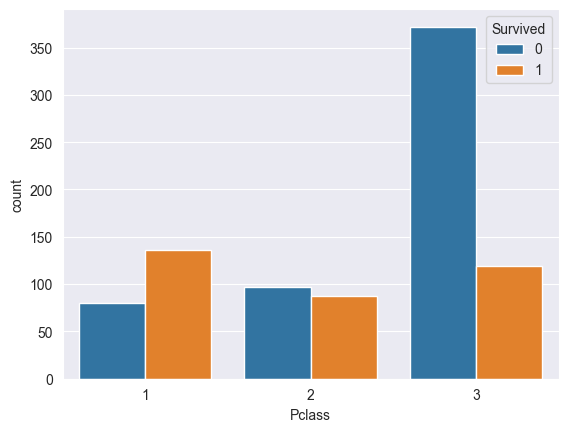

In [192]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_df)
plt.show()

This shows that people with `1st class` had highest chances of survival `(~ 63%)` followed by `second class (~ 48%)` and `third class people had ~25% `chances. Average Society behaviour.

In [194]:
titanic_df[titanic_df.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,NaN,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,NaN,S,0
466,467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,NaN,S,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,NaN,S,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,NaN,S,0


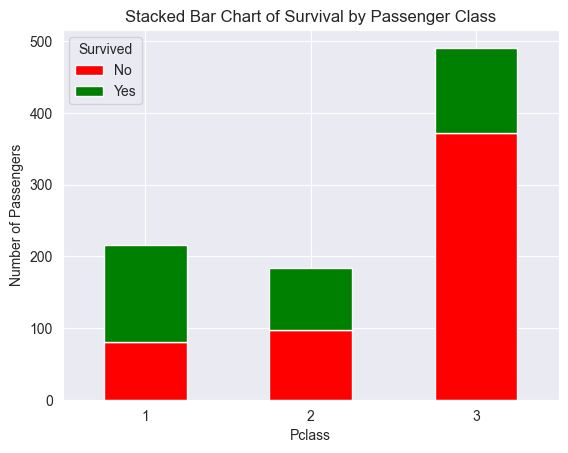

In [196]:


# Create a grouped count of Survived by Pclass
stack_data = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

# Plot as a stacked bar chart
stack_data.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Stacked Bar Chart of Survival by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()


In [197]:
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Age Distribution')

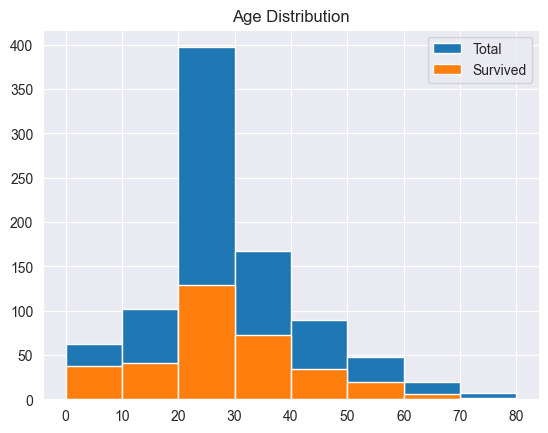

In [198]:
# Age Distribution:-
plt.hist( x = 'Age', bins = np.arange(0, 90,10), data = titanic_df)
plt.hist( x = 'Age', bins = np.arange(0, 90,10), data = survived_df)
plt.legend(['Total', 'Survived'])
plt.title("Age Distribution")

###  Correlation Heatmap:-

A correlation heatmap shows how strongly related different numerical features are to each other.

Values range from -1 to +1:

+1 → Perfect positive correlation (e.g., as Fare increases, another variable increases).

0 → No correlation.

-1 → Perfect negative correlation (e.g., as Age increases, some score decreases)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

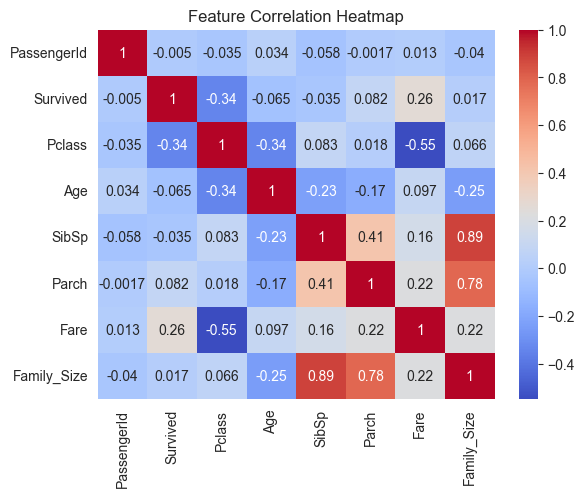

In [200]:
sns.heatmap(titanic_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

In [201]:
corr_target = titanic_df.corr(numeric_only=True)['Survived'].sort_values(ascending=False)
print(corr_target)

Survived       1.000000
Fare           0.257307
Parch          0.081629
Family_Size    0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


In [203]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [204]:
# Just for using drop:-

wo_cabin_df = titanic_df.drop('Cabin', axis = 1)
wo_cabin_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0


In [206]:
titanic_df['Family_Size'] = titanic_df.SibSp + titanic_df.Parch
survived_df['Family_Size'] = survived_df.SibSp + survived_df.Parch

C:\Users\yash0\AppData\Local\Temp\ipykernel_30764\3143201597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived_df['Family_Size'] = survived_df.SibSp + survived_df.Parch


In [207]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [208]:
survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0


In [209]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


(array([163.,  89.,  59.,  21.,   3.,   3.,   4.,   0.,   0.,   0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

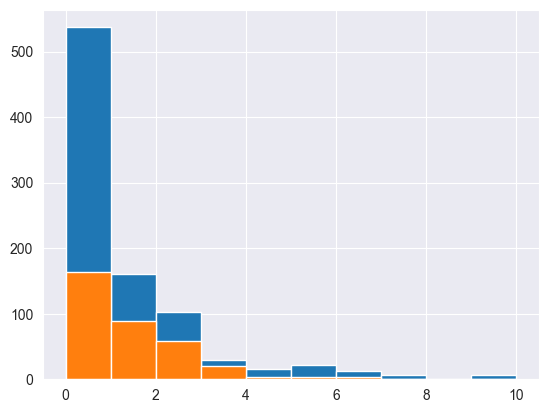

In [210]:
plt.hist(x = 'Family_Size', bins = np.arange(0,11, 1), data = titanic_df)
plt.hist(x = 'Family_Size', bins = np.arange(0,11, 1), data = survived_df)

In [211]:
age_grouped_df = titanic_df.groupby('Age')['Survived'].agg(
    total='count',
    survived='sum'
)

In [212]:
age_grouped_df

,total,survived
Age,,
0.42,1,1
0.67,1,1
0.75,2,2
0.83,2,2
0.92,1,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


Inside `agg`:

**total='count'** means:

- Count the number of rows (values) in the 'Survived' column for each group.

- This gives the total number of people in each Age.

**survived='sum'** means:

- Sum the values in the 'Survived' column for each group.

- Assuming 'Survived' is a binary column (0 = not survived, 1 = survived), the sum gives the number of survivors in each Age.

In [214]:
Gender_counts = titanic_df.Sex.value_counts()
Gender_counts

Sex
male      577
female    314
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2c4ef0eb170>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.8%'),
  Text(0.26833391225261044, -0.53665343708506, '35.2%')])

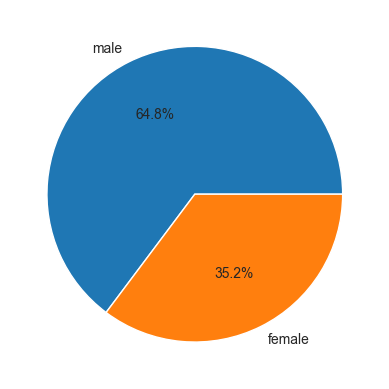

In [215]:
plt.pie(Gender_counts, labels = Gender_counts.index, autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x2c4ef197a70>,
 [Text(-0.5931585979711493, 0.9263708100177275, 'female'),
  Text(0.5931586847042417, -0.9263707544822074, 'male')],
 [Text(-0.32354105343880873, 0.5052931691005785, '68.1%'),
  Text(0.3235411007477682, -0.5052931388084767, '31.9%')])

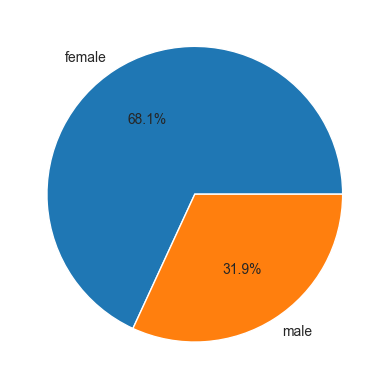

In [219]:
survived_gender_counts = survived_df.Sex.value_counts()

plt.pie(survived_gender_counts, labels = survived_gender_counts.index, autopct = '%1.1f%%')

`autopct` tells to also show percentage on the pie chart.<br>` %1.1f%` tells **1 digit before decimal, 1 digit after decimal, f shows floating point number.**

There were about 64% males and 36% females in total passengers. But in survived passengers, there were 68% females and 32% males

In [222]:
# Pie chart can also be a good way to show age disrtibution but firstly we have to divide ages into categories:-
copy_titanic = titanic_df.copy()
copy_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [223]:
copy_titanic['Age_Group'] = pd.cut(copy_titanic['Age'], bins = [0, 12, 19, 59, 80], labels = ['Child', 'Teen', 'Adult', 'Old Age'], right = True)
copy_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Teen
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,3,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Adult


In [224]:
age_count = copy_titanic.Age_Group.value_counts()
age_count

Age_Group
Adult      701
Teen        95
Child       69
Old Age     26
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2c4ef1ca390>,
 [Text(-0.8622555042746053, 0.6830193594241282, 'Adult'),
  Text(0.5898024005970288, -0.9285112429313832, 'Teen'),
  Text(1.0013992336158495, -0.4551918001387873, 'Child'),
  Text(1.0953809818436935, -0.1007000725677314, 'Old Age')],
 [Text(-0.47032118414978463, 0.3725560142313426, '78.7%'),
  Text(0.321710400325652, -0.5064606779625725, '10.7%'),
  Text(0.5462177637904633, -0.2482864364393385, '7.7%'),
  Text(0.5974805355511055, -0.054927312309671676, '2.9%')])

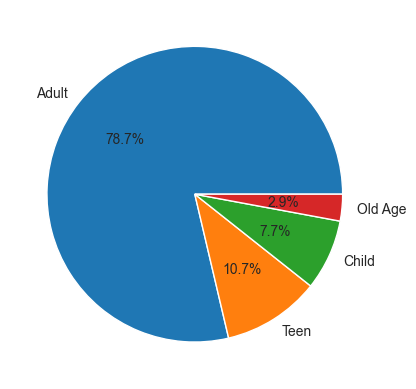

In [225]:
plt.pie(age_count, labels = age_count.index, autopct = '%1.1f%%')

In [226]:
# People Trvaelling with family or alone:-
family_size = copy_titanic.Family_Size.value_counts()
family_size

Family_Size
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [227]:
survived_family_size = survived_df.Family_Size.value_counts()
survived_family_size 

Family_Size
0    163
1     89
2     59
3     21
6      4
5      3
4      3
Name: count, dtype: int64

Text(0.5, 1.0, 'Family Size: Total vs Survived')

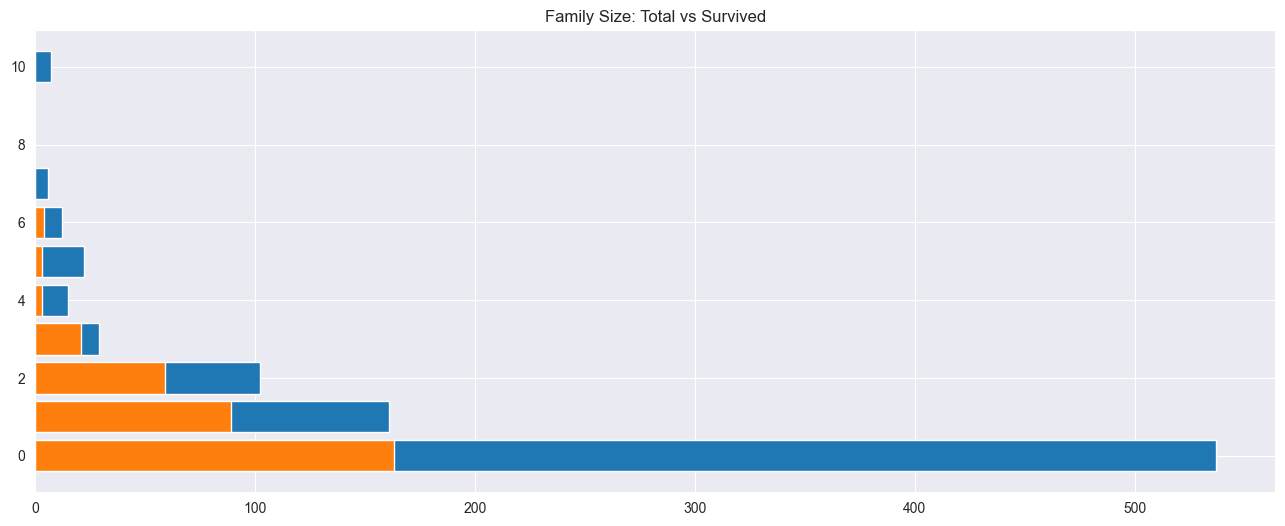

In [228]:
plt.figure(figsize = (16, 6))
plt.barh(family_size.index, family_size)  
plt.barh( survived_family_size.index, survived_family_size)
plt.title("Family Size: Total vs Survived")

## ------Working on Model------------

In [384]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [386]:
(titanic_df.Sex).info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [388]:
titanic_copy = titanic_df.copy()

In [390]:
titanic_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [392]:
titanic_copy['Age'].fillna({'Age' : titanic_copy['Age'].median()})
titanic_copy['Embarked'].fillna({'Embarked' : titanic_copy['Embarked'].mode()[0]})

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [394]:
titanic_copy.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace = True)

In [396]:
titanic_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


#### Converting categorical data into numerical:-
`Sex :`        Male:0,       female:1<BR>

`Embarked :` C:0,</t> S:1, Q:2

In [399]:
titanic_copy['Sex'].unique()

array(['male', 'female'], dtype=object)

In [401]:
titanic_copy['Sex'] = titanic_copy['Sex'].map({'male' : 0, 'female' : 1})

In [403]:
titanic_copy['Embarked'] = titanic_copy['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

In [405]:
titanic_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,0.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,2.0
887,888,1,1,1,19.0,0,0,30.0000,2.0
888,889,0,3,1,NaN,1,2,23.4500,2.0
889,890,1,1,0,26.0,0,0,30.0000,0.0


In [407]:
# As observed Passengers travelling with family had Higher survival chance. 
#So what we are gonna do is we will take parch and siblings and add will together to create family size.

In [409]:
titanic_copy['Family_size'] = titanic_copy['SibSp'] + titanic_copy['Parch'] + 1 
# +1 because sibsp and parch don't include him/herself so family_size = 1..means travelling alone 

In [411]:
titanic_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,1,0,3,0,22.0,1,0,7.2500,2.0,2
1,2,1,1,1,38.0,1,0,71.2833,0.0,2
2,3,1,3,1,26.0,0,0,7.9250,2.0,1
3,4,1,1,1,35.0,1,0,53.1000,2.0,2
4,5,0,3,0,35.0,0,0,8.0500,2.0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,2.0,1
887,888,1,1,1,19.0,0,0,30.0000,2.0,1
888,889,0,3,1,NaN,1,2,23.4500,2.0,4
889,890,1,1,0,26.0,0,0,30.0000,0.0,1


In [417]:
titanic_copy.drop(columns = ['SibSp', 'Parch'], inplace = True)

In [421]:
titanic_copy.drop(columns = ['PassengerId'], inplace = True)

In [423]:
titanic_copy

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,0,22.0,7.2500,2.0,2
1,1,1,1,38.0,71.2833,0.0,2
2,1,3,1,26.0,7.9250,2.0,1
3,1,1,1,35.0,53.1000,2.0,2
4,0,3,0,35.0,8.0500,2.0,1
...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,2.0,1
887,1,1,1,19.0,30.0000,2.0,1
888,0,3,1,NaN,23.4500,2.0,4
889,1,1,0,26.0,30.0000,0.0,1


### -----------Training and Testing----------------

**✅ Why Train-Test Split?**<br>
         **`Train set` → used to fit the model (learn patterns)**

         `Test set` → used to evaluate the model on unseen data

         We typically do an 80/20 split (80% train, 20% test) or 70/30.

         This helps us know how well the model will perform on new data.

In [438]:
from sklearn.model_selection import train_test_split

In [440]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_size']
X = titanic_copy[features]
y = titanic_copy['Survived']

In [445]:
# Splitting the data:-
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

**✅ What is random_state?**<BR>
        When you split data, train_test_split randomly shuffles the rows before splitting.

        This randomness means every time you run it, you might get a slightly different train/test split → and therefore slightly different results.

        👉 random_state is like a seed for the random number generator.

        If you fix it (e.g., random_state=42), the split will always be the same every time you run it.

        If you don’t set it → the split will be different every run.

**✅ Why 42?**<BR>
   Honestly… 42 has no magic meaning in ML 😂.
        It’s a nerdy joke → in the book Hitchhiker’s Guide to the Galaxy, 42 is “the answer to life, the universe, and everything.”

       You can set it to any integer (1, 7, 99…) and it will work fine.

        What matters is:

        Same random_state → same split (for reproducibility)

        Different random_state → different split

        So 42 is just a commonly used convention.

**They’re equivalent because:**

`train_size = 0.8` → remaining 0.2 becomes test

`test_size = 0.2` → remaining 0.8 becomes train

In [456]:
print(X_train.isnull().sum())


Pclass           0
Sex              0
Age            140
Fare             0
Embarked         2
Family_size      0
dtype: int64


### ----------------Training a model--------------------------

In [450]:
from sklearn.linear_model import LogisticRegression

In [524]:
# lgr = LogisticRegression(max_iter = 1000)
# lgr.fit(X_train, y_train)

# giving error because some values were NaN in train and test data.

In [462]:
# Fill missing Age with median (separately for train & test)
X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'].fillna(X_test['Age'].median())

# Fill missing Embarked with most common
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0])
X_test['Embarked'].fillna(X_test['Embarked'].mode()[0])

# Double-check again
print(X_train.isnull().sum())
print(X_test.isnull().sum())


Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64


In [472]:
# TRAINING
lgr = LogisticRegression(max_iter = 1000)
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [474]:
# prediction
y_pred = lgr.predict(X_test)

In [476]:
y_pred[:10]    #-----only 10 to just check

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

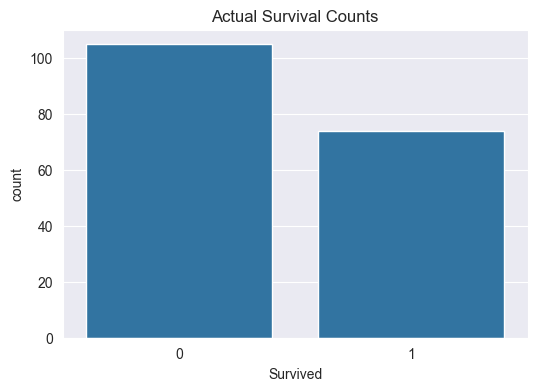

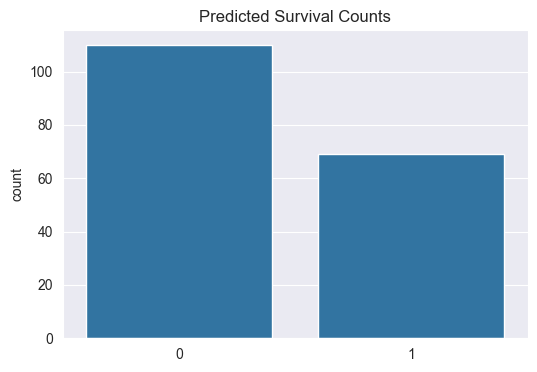

In [486]:
# plotting:-
plt.figure(figsize = (6,4))
sns.countplot(x = y_test)
plt.title("Actual Survival Counts")
plt.show()

plt.figure(figsize = (6,4))
sns.countplot(x = y_pred)
plt.title("Predicted Survival Counts")
plt.show()

In [496]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [498]:
# Accuracy:-
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

# Confusion Matrix:-
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred)}")

# Precision, Recall and F1-score:-
print(f"Classification Report : {classification_report(y_test, y_pred)}")

Accuracy : 0.8044692737430168
Confusion Matrix : [[90 15]
 [20 54]]
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



          Predicted No   Predicted Yes
Actual No&emsp;     TN&emsp; &emsp;                FP<br>
Actual Yes&emsp;    FN  &emsp; &emsp;            TP

***✅ 3. Precision, Recall, F1-score***
         From confusion matrix, we calculate:

**Precision (How many predicted survivors were actually correct?)**

        Precision = TP / (TP + FP)
        → If we predict 50 survivors, but only 40 were correct → 80% precision.

**Recall (How many actual survivors did we correctly find?)**

        Recall = TP / (TP + FN)
        → If 100 survived, but we only caught 60 → 60% recall.

**F1-score → balance of Precision & Recall**

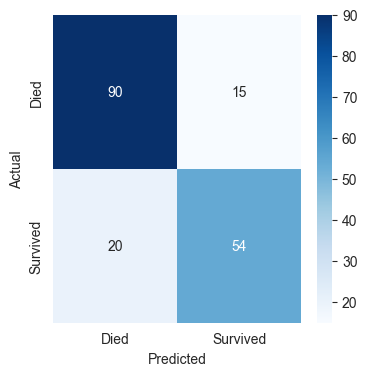

In [522]:
cm = confusion_matrix(y_test, y_pred)
                      
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd', xticklabels = ['Died', 'Survived'], yticklabels = ['Died', 'Survived']  )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

